# PyGfx cube example

**Note that this example depends on pygfx (`pip install -U pygfx`).**

An example showing a lit, textured, rotating cube.

RFBOutputContext()

Forcing backend: Vulkan (4)



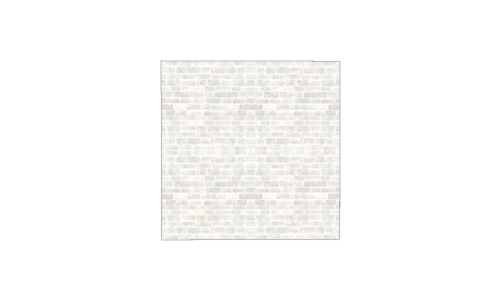

JupyterWgpuCanvas()

In [1]:
import numpy as np
import imageio
import pygfx as gfx

from wgpu.gui.jupyter import WgpuCanvas

canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)
scene = gfx.Scene()

im = imageio.imread("imageio:bricks.jpg").astype(np.float32) / 255
tex = gfx.Texture(im, dim=2).get_view(filter="linear", address_mode="repeat")

geometry = gfx.BoxGeometry(200, 200, 200)
geometry.texcoords.data[:] *= 2  # smaller bricks
material = gfx.MeshPhongMaterial(map=tex, color=(1, 0, 0, 0.2), clim=(0.2, 0.8))
cube = gfx.Mesh(geometry, material)
scene.add(cube)

camera = gfx.PerspectiveCamera(70, 16 / 9)
camera.position.z = 400


def animate():
    rot = gfx.linalg.Quaternion().set_from_euler(gfx.linalg.Euler(0.005, 0.01))
    cube.rotation.multiply(rot)

    renderer.render(scene, camera)
    canvas.request_draw()

    
canvas.request_draw(animate)
canvas